# Import Data

In [351]:
#Import packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [352]:
imdb1 = pd.read_csv('IMDbScrapeFull.csv')
imdb2 = pd.read_csv('IMDbScrape2.csv')

In [353]:
imdbfull = pd.concat([imdb1,imdb2], axis=0)
movie = imdbfull.drop_duplicates()

In [354]:
movie

,Title,Release_Date,ViewRating,Genres,Budget,DomesticGross,WorldwideGross,Description,Keywords,Runtime
0,Dune,2021,PG-13,Action Adventure Drama Sci-Fi,"165,000,000 (estimated)","83,946,162","330,446,162",A mythic and emotionally charged hero's journe...,desert sand chosen one based on novel dune 375...,173.0
1,After We Fell,2021,R,Drama,Non,"2,170,750","21,666,463",Just as Tessa makes the biggest decision of he...,young adult based on young adult novel sequel ...,143.0
2,Cruella,2021,PG-13,Adventure Comedy Crime Drama,"100,000,000 (estimated)","86,103,234","233,274,812","Before she becomes Cruella de Vil, teenage Est...",female villain cruella de vil character live a...,161.0
3,Infinite,2021,PG-13,Action Sci-Fi Thriller,NaN,NaN,NaN,"A sci-fi, action adaption that examines the co...",reincarnation bullet dodging deflecting bullet...,124.0
4,There's Someone Inside Your House,2021,TV-MA,Horror Mystery Thriller,NaN,NaN,NaN,"Makani Young has moved from Hawaii to quiet, s...",girl slasher masked killer blood murder 15 more,123.0
...,...,...,...,...,...,...,...,...,...,...
6257,Osanazuma,1970,NaN,NaN,NaN,NaN,NaN,NaN,based on novel,60.0
6258,Tskaldidoba,1970,NaN,Drama,NaN,NaN,NaN,NaN,new life fisherman bad guy based on novel,60.0
6259,Jänken,1970,NaN,Drama,"<li class=""ipc-metadata-list__item BoxOffice__...",Non,Non,Inger gets pregnant with an American man who a...,eastern europe based on novel,60.0
6260,"Nem Amantes, Nem Amigos",1970,NaN,Drama,NaN,NaN,NaN,NaN,based on novel,60.0


# Begin Cleaning
    - Drop domestic gross profit and use worldwide gross profit
    - Clean worldwide gross profit
    - Clean budget

In [355]:
if 'DomesticGross' in movie.columns:
    
    flag = True # used in next block to ensure rerunning block doesn't throw error
    
    movie = movie.iloc[89:,:] # drop movies made in 2021 since incomplete data
    movie = movie.drop(labels = ['DomesticGross'], axis = 1) # drop domestic, worldwide is more important
    movie['WorldwideGross'] = movie['WorldwideGross'].str.replace(',','')
    movie['Budget'] = movie['Budget'].str.replace(',','')
    movie['Budget'] = movie['Budget'].str.split(' ').str[0]
    movie = movie.dropna(subset = ['WorldwideGross'], axis = 0)
    movie = movie.reset_index(drop = True)

    for i in range(movie['WorldwideGross'].shape[0]): 
        if (movie['WorldwideGross'].loc[i] == 'Non') | (movie['WorldwideGross'].loc[i][0] == '<'):
            movie = movie.drop(index = i)
        else:
            continue
            
    movie = movie.reset_index(drop = True)

            
    for i in range(movie['Budget'].shape[0]): 
        if (movie['Budget'].loc[i] == 'Non') | (movie['Budget'].loc[i][0] == '<'):
            movie = movie.drop(index = i)
        else:
            continue
            
    movie = movie.reset_index(drop = True)
    
    

movie['WorldwideGross'] = movie['WorldwideGross'].astype(int)
movie['Budget'] = movie['Budget'].astype(int)
movie

,Title,Release_Date,ViewRating,Genres,Budget,WorldwideGross,Description,Keywords,Runtime
0,The Invisible Man,2020,R,Drama Horror Mystery Sci-Fi Thriller,7000000,143151000,"The film follows Cecilia, who receives the new...",domestic abuse psychological abuse invisibilit...,124.0
1,Emma.,2020,PG,Comedy Drama Romance,10000000,26404660,Jane Austen's beloved comedy about finding you...,nineteenth century female protagonist declarat...,124.0
2,Dolittle,2020,PG,Adventure Comedy Family Fantasy,175000000,245438444,"After his wife's death, Dr. John Dolittle (Rob...",gorilla grief duck live action cgi hybrid ship...,74.0
3,The Call of the Wild,2020,PG,Adventure Drama Family,135000000,111105497,The Call of the Wild is a vibrant story of Buc...,1890s remake alaska snow dog 93 more,64.0
4,The Rhythm Section,2020,R,Action Drama Mystery Thriller,50000000,5989583,"Blake Lively stars as Stephanie Patrick, an or...",female assassin revenge terrorism female prota...,154.0
...,...,...,...,...,...,...,...,...,...
1369,Love Story,1970,PG,Drama Romance,2200000,106550690,The love story of young adults Oliver Barrett ...,love famous line baker main character dies 197...,60.0
1370,Airport,1970,G,Action Drama Thriller,10000000,100489151,"This precursor to later ""epic"" 1970s disaster ...",boeing 707 cockpit air crew airport bomb 220 m...,120.0
1371,Little Big Man,1970,PG-13,Adventure Comedy Drama Western,15000000,31559552,Jack Crabb is 121 years old as the film begins...,revisionist western based on novel cheyenne in...,120.0
1372,Beneath the Planet of the Apes,1970,G,Action Adventure Sci-Fi,3000000,18999718,"Brent is an American astronaut, part of a team...",ape planet of the apes planet astronaut rescue...,60.0


# Organizing, reshuffling, renaming etc. 

count    1374.000000
mean        2.482462
std         4.330006
min         0.000034
25%         0.378290
50%         1.287334
75%         2.822895
max        67.344471
Name: Revenue-Budget-Ratio, dtype: float64


(-1.0, 35.0)

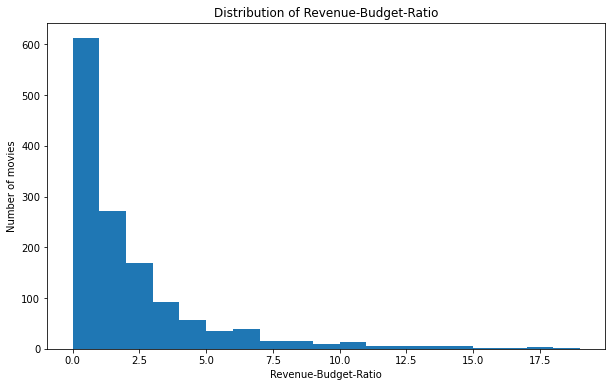

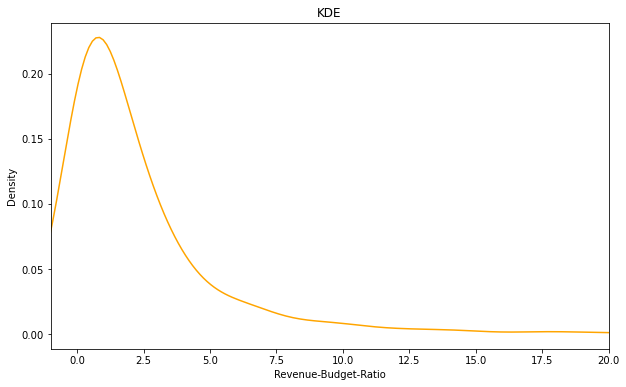

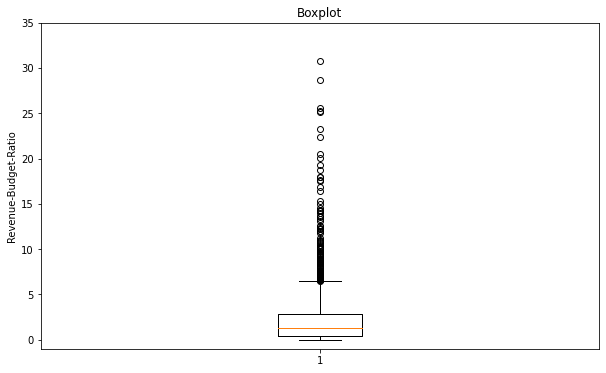

In [356]:
if flag: 
    flag = False
    movie = movie.rename(columns = {'Release_Date': 'Year','ViewRating':'Rating'})
    movie['Revenue-Budget-Ratio'] = movie['WorldwideGross'] / movie['Budget']
    movie['Year'] = movie['Year'].astype(int)
    movie['Runtime'] = movie['Runtime'].astype(int)
    
    movie['Rating'] = movie['Rating'].fillna('Unknown')

# VISUALIZATION: 

print(movie['Revenue-Budget-Ratio'].describe()) # aggregate statistics

target = movie['Revenue-Budget-Ratio']
bins = np.arange(0,20,1)
plt.figure(figsize = (10,6))
plt.hist(target, bins = bins)
plt.title('Distribution of Revenue-Budget-Ratio')
plt.xlabel('Revenue-Budget-Ratio')
plt.ylabel('Number of movies')

plt.figure(figsize = (10,6))
target.plot(kind = 'kde', color = 'orange' )
plt.title('KDE')
plt.xlabel('Revenue-Budget-Ratio')
plt.xlim(-1,20)

plt.figure(figsize = (10,6))
plt.boxplot(target)
plt.title('Boxplot')
plt.ylabel('Revenue-Budget-Ratio')
plt.ylim(-1,35)


# Distribution is clearly exponential or poisson - I THINK??
Analysis: 

This makes sense. A larger ratio is a financially successful movie. Many movies are not successful, and in fact for every ~10 movies only about 3 are successful, paying for the 7 unsuccessful ones. Subsequently, it makes perfect sense that the distribution of this revenue/budget ratio is skewed heavily towards the lower end. 

A ratio of 1 means that the company actually lost money on the movie, since revenue does not take into account costs, so the profit would be less than the budget (i.e. a loss). 

The median of the data is 1.29 and the mean is 2.48. Therefore, while we don't have a lot of data, it does seem to be representative of the overall larger distribution of movies. The median revenue/budget ratio is a financial loss, and the mean is a bit better since it includes the outliers (the successful movies). 

While there are a lot of outliers here (as seen on the boxplot), these are very imporatnt to include since ultimately when a movie studio makes a movie, they want to be the outlier themselves. (outlier = highly profitable)

In [357]:
movie = movie.drop(labels = ['Budget','WorldwideGross'], axis = 1) # dropping these since our target is a function of these two features

# Ordinal Encoding Ratings

In [358]:
for i in range(movie.shape[0]):
    if (movie['Rating'].loc[i]) == '':
        continue
    elif (movie['Rating'].loc[i]) == 'TV-PG':
        movie['Rating'].loc[i] = 'PG'
    elif (movie['Rating'].loc[i]) == 'Unrated':
        movie['Rating'].loc[i] = 'Not Rated'
    elif (movie['Rating'].loc[i]) == 'TV-14':
        movie['Rating'].loc[i] = 'PG-13'
    elif (movie['Rating'].loc[i]) == 'TV-MA':
        movie['Rating'].loc[i] = 'NC-17'
    elif (movie['Rating'].loc[i]) == 'X':
        movie['Rating'].loc[i] = 'NC-17'
    elif (movie['Rating'].loc[i]) == 'GP':
        movie['Rating'].loc[i] = 'PG'
    elif (movie['Rating'].loc[i]) == 'Approved':
        movie['Rating'].loc[i] = 'R'
        
# ordinal encoding myself

ratings = {'G':0.0, 'PG':1.0, 'PG-13':2.0,'R':3.0,'NC-17':4.0, 'Not Rated':5.0, 'Unknown':6.0} # dictionary mapping
movie['Rating'] = movie['Rating'].replace(ratings) # replace categories with ordinally encoded values

# One-Hot Encoding Genre

In [359]:
movie['Genres'] = movie['Genres'].str.split(' ').str[0] # grab first genre in list and assign this as the movie's single genre
movie = movie.rename(columns = {'Genres':'Genre'}) # rename to singular form
flag = True

In [360]:
if flag:
    flag = False
    enc = OneHotEncoder(handle_unknown='ignore') # one-hot encoder
    enc.fit(np.array(movie['Genre']).reshape(-1,1))

    columns = list(enc.get_feature_names())

    for i in range(len(columns)):
        columns[i] = columns[i].split('_')[-1]

    enc_vals = enc.transform(np.array(movie['Genre']).reshape(-1,1))
    enc_df = pd.DataFrame(enc_vals.toarray(), columns = columns)

    targets = movie['Revenue-Budget-Ratio']
    movie = pd.concat([movie.drop(labels = ['Revenue-Budget-Ratio','Genre'], axis = 1),enc_df,targets], axis = 1)


# Remove additional duplicates that Maria found

In [361]:
movie = movie[~movie.duplicated()]
movie = movie.reset_index(drop = True)
movie

,Title,Year,Rating,Description,Keywords,Runtime,Action,Adventure,Animation,Biography,...,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,Western,Revenue-Budget-Ratio
0,The Invisible Man,2020,3.0,"The film follows Cecilia, who receives the new...",domestic abuse psychological abuse invisibilit...,124,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.450143
1,Emma.,2020,1.0,Jane Austen's beloved comedy about finding you...,nineteenth century female protagonist declarat...,124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.640466
2,Dolittle,2020,1.0,"After his wife's death, Dr. John Dolittle (Rob...",gorilla grief duck live action cgi hybrid ship...,74,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.402505
3,The Call of the Wild,2020,1.0,The Call of the Wild is a vibrant story of Buc...,1890s remake alaska snow dog 93 more,64,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.823004
4,The Rhythm Section,2020,3.0,"Blake Lively stars as Stephanie Patrick, an or...",female assassin revenge terrorism female prota...,154,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Love Story,1970,1.0,The love story of young adults Oliver Barrett ...,love famous line baker main character dies 197...,60,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.432132
1337,Airport,1970,0.0,"This precursor to later ""epic"" 1970s disaster ...",boeing 707 cockpit air crew airport bomb 220 m...,120,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.048915
1338,Little Big Man,1970,2.0,Jack Crabb is 121 years old as the film begins...,revisionist western based on novel cheyenne in...,120,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.103970
1339,Beneath the Planet of the Apes,1970,0.0,"Brent is an American astronaut, part of a team...",ape planet of the apes planet astronaut rescue...,60,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.333239


# Merge with cleaned book data from Miranda

In [362]:
book = pd.read_csv('mm_LibraryThingFull.csv')
book = book.drop(labels = ['Link1','Link2'],axis = 1)
book['SearchTerm'] = book['SearchTerm'].str.split('[').str[0]
book['Year'] = book['Year'].str.split('[').str[-1].str.split('film').str[0]
book['author_x'] = book['author_x'].str.split('by ').str[-1]
book = book.rename(columns = {'SearchTerm':'movie_title','Year':'movie_year' ,'AdaptationOf':'book_title','published_x':'book_year','author_x':'author','series_x':'num_books_in_series','rating_x':'rating','charnum_x':'charnum','awardnum_x':'awardnum'})

book

,movie_title,movie_year,book_title,book_year,author,num_books_in_series,rating,charnum,awardnum
0,The Invisible Man,2020,The Invisible Man,1897.0,H. G. Wells,0.0,-3.53,18.0,6.0
1,Emma,2020,Emma,1816.0,Jane Austen,0.0,-4.07,69.0,19.0
2,The Call of the Wild,2020,The Call of the Wild,1903.0,Jack London,0.0,-3.79,24.0,25.0
3,The Rhythm Section,The Rhythm Section,NaN,1999.0,Mark Burnell,1.0,-3.70,1.0,1.0
4,After Darkness,2019,After,NaN,Hazel J. Hutchins,0.0,-3.08,1.0,1.0
...,...,...,...,...,...,...,...,...,...
1155,MASH: A Novel About Three Army Doctors,MASH: A Novel About Three Army Doctors,NaN,1968.0,"Richard Hooker, Richard Hooker",1.0,-3.81,8.0,1.0
1156,Love Story,1970,Love Story,1970.0,Erich Segal,1.0,-3.36,5.0,7.0
1157,Airport,1970,Airport,NaN,Arthur Hailey,0.0,-3.55,11.0,3.0
1158,Little Big Man,1970,Little Big Man,1964.0,"Thomas Berger, Thomas Berger",1.0,-4.15,1.0,5.0


# Analysis of books_and_movies
- Data distribution still representative of overall distribution of movies, as you can tell by the shape of the histogram

count    756.000000
mean       2.654500
std        4.799578
min        0.000152
25%        0.402818
50%        1.325628
75%        3.087178
max       67.344471
Name: Revenue-Budget-Ratio, dtype: float64


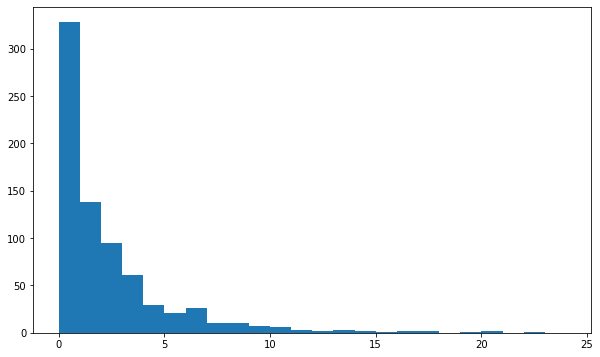

In [363]:
merge1 = pd.merge(movie,book,how = 'inner', left_on = 'Title', right_on = 'book_title') # 672 rows
merge2 = pd.merge(movie,book,how = 'inner', left_on = 'Title', right_on = 'movie_title') # 123 rows

books_and_movies = pd.concat([merge1,merge2], axis = 0) # concat them together 
books_and_movies = books_and_movies.drop_duplicates(subset = 'Title') # drop any duplicate entries in the dataframe
books_and_movies = books_and_movies.drop(labels = ['movie_title','book_title','movie_year'], axis = 1)


target = books_and_movies['Revenue-Budget-Ratio']
print(target.describe())
bins = np.arange(0,25,1)
plt.figure(figsize = (10,6))
plt.hist(target, bins = bins)


books_and_movies['rating'] = books_and_movies['rating'].fillna(books_and_movies['rating'].median())
books_and_movies['rating'] = (books_and_movies['rating'].astype(float) * -1)


# Feature correlation analysis with target: 

In [364]:
books_and_movies.corr()

,Year,Rating,Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Romance,Sci-Fi,Thriller,Western,Revenue-Budget-Ratio,book_year,num_books_in_series,rating,charnum,awardnum
Year,1.000000,0.124941,0.296448,-0.005342,-0.047421,-0.039117,0.002241,0.002985,-0.029348,0.084149,...,0.028378,0.020053,-0.006554,0.020053,-0.126263,0.201994,-0.042703,0.051556,0.043704,0.177418
Rating,0.124941,1.000000,0.070443,-0.008908,-0.164295,-0.205219,0.050269,-0.008056,0.119693,0.061524,...,-0.046146,-0.015974,0.087694,0.017294,-0.113931,0.164056,-0.158683,-0.151485,-0.097393,-0.182693
Runtime,0.296448,0.070443,1.000000,-0.019814,0.003078,-0.083546,0.053149,-0.096026,0.058688,0.066016,...,0.041106,0.034890,-0.060534,0.033916,0.041128,0.030147,0.032423,0.077562,0.094754,0.197386
Action,-0.005342,-0.008908,-0.019814,1.000000,-0.147764,-0.070717,-0.066337,-0.227135,-0.169229,-0.333623,...,-0.024013,-0.016969,-0.029430,-0.016969,-0.017632,-0.026542,0.234206,-0.032647,0.028272,-0.040401
Adventure,-0.047421,-0.164295,0.003078,-0.147764,1.000000,-0.048067,-0.045090,-0.154387,-0.115027,-0.226768,...,-0.016322,-0.011534,-0.020004,-0.011534,0.092029,-0.176772,0.096818,0.105677,0.057494,0.128020
Animation,-0.039117,-0.205219,-0.083546,-0.070717,-0.048067,1.000000,-0.021579,-0.073887,-0.055050,-0.108527,...,-0.007811,-0.005520,-0.009573,-0.005520,0.009757,-0.078432,0.029152,0.104047,0.183905,0.066388
Biography,0.002241,0.050269,0.053149,-0.066337,-0.045090,-0.021579,1.000000,-0.069311,-0.051640,-0.101806,...,-0.007328,-0.005178,-0.008980,-0.005178,-0.039279,0.029737,-0.003450,0.001821,-0.058782,-0.053730
Comedy,0.002985,-0.008056,-0.096026,-0.227135,-0.154387,-0.073887,-0.069311,1.000000,-0.176814,-0.348577,...,-0.025090,-0.017729,-0.030749,-0.017729,-0.052627,0.103411,-0.009165,-0.083283,-0.047235,-0.117820
Crime,-0.029348,0.119693,0.058688,-0.169229,-0.115027,-0.055050,-0.051640,-0.176814,1.000000,-0.259710,...,-0.018693,-0.013209,-0.022910,-0.013209,-0.024751,0.060439,0.005891,-0.075258,-0.032229,-0.057531
Drama,0.084149,0.061524,0.066016,-0.333623,-0.226768,-0.108527,-0.101806,-0.348577,-0.259710,1.000000,...,-0.036852,-0.026041,-0.045165,-0.026041,-0.008103,0.018951,-0.255089,0.088820,-0.036263,0.100535


# Prepare for modeling

In [365]:
targets = books_and_movies['Revenue-Budget-Ratio']
books_and_movies = books_and_movies.drop(labels = ['Title','Description','Keywords','author','Revenue-Budget-Ratio'], axis = 1)

In [366]:
books_and_movies['num_books_in_series'] = books_and_movies['num_books_in_series'].fillna(1)
books_and_movies['charnum'] = books_and_movies['charnum'].fillna(books_and_movies['charnum'].median())
books_and_movies['awardnum'] = books_and_movies['awardnum'].fillna(0)
books_and_movies['book_year'] = books_and_movies['book_year'].fillna(books_and_movies['book_year'].median()) # this is a questionable decision?


# Convert continuous output to categorical output

In [367]:
X = books_and_movies
y = targets

for i in range(len(y)):
    if (y.iloc[i] <= 5):
        y.iloc[i] = 0
    else:
        y.iloc[i] = 1
        
y.value_counts()


0.0    651
1.0    105
Name: Revenue-Budget-Ratio, dtype: int64

# Model and test

In [368]:
def get_average_auroc(X,y,estimator,num_iter):
    
    auroc = []
    
    for n in range(num_iter):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)
        estimator.fit(X_train,y_train)
        preds = estimator.predict(X_test)
        auroc.append(roc_auc_score(y_test,preds))
    
    return np.mean(auroc)

In [369]:
lg = get_average_auroc(X,y,LogisticRegression(),100)
print('Average AUROC:',lg)

rf = get_average_auroc(X,y,RandomForestClassifier(),100)
print('Average AUROC:',rf)

Average AUROC: 0.5297729613574491
Average AUROC: 0.5349315222208577
